## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [1]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from numpy.polynomial.polynomial import polyfit

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [2]:
df = pd.read_csv('penguin.csv')

2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [6]:
df.describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       334 non-null    object 
 1   panjang_paruh_atas  334 non-null    float64
 2   tebal_paruh_atas    334 non-null    float64
 3   panjang_sirip       334 non-null    float64
 4   massa_tubuh         334 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.3+ KB


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

<AxesSubplot:xlabel='pulau_habitat', ylabel='count'>

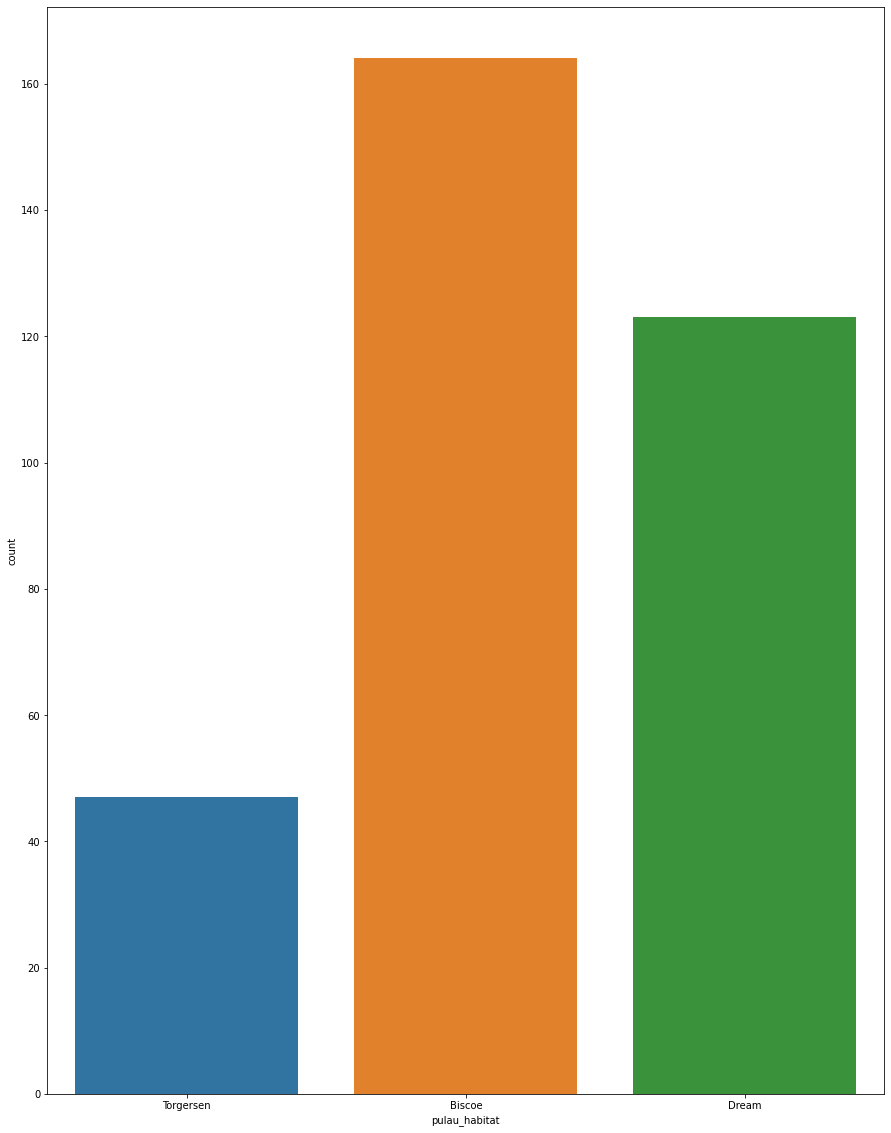

In [8]:
# Visualisasi data atribut pulau_habitat
plt.figure(figsize=(15,20))
sns.countplot(data = df, x = 'pulau_habitat')

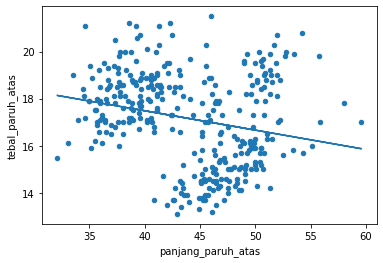

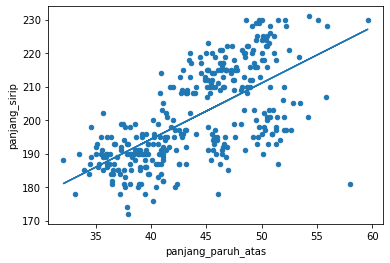

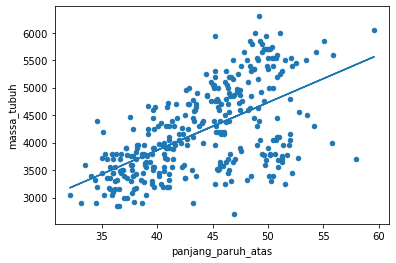

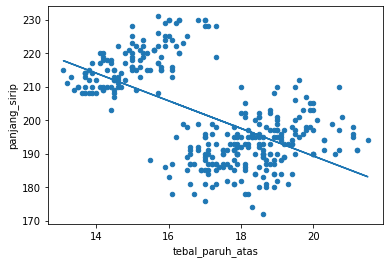

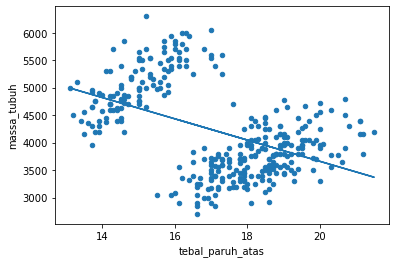

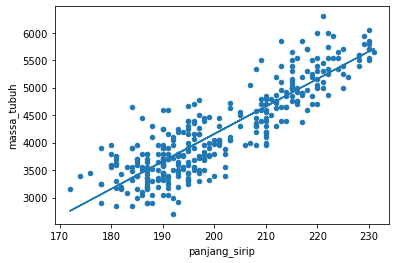

In [4]:
# Memahami hubungan dua buah atribut
list_atribut = ['panjang_paruh_atas', 'tebal_paruh_atas', 'panjang_sirip', 'massa_tubuh']
atribut = [False, False, False, False]
def aaa(ax, ay):
    atribut1 = df[ax]
    atribut2 = df[ay]
    df.plot.scatter(x=ax, y=ay, figsize=(6,4))
    b_a, m_a = polyfit(atribut1, atribut2, 1)
    plt.plot(atribut1, b_a + m_a * atribut1, '-')
    plt.show()
for i in range(len(list_atribut)):
    for j in range(len(list_atribut)):
        if list_atribut[i]!=list_atribut[j] and not atribut[j]:
            atribut[i] = True
            aaa(list_atribut[i], list_atribut[j])

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

In [29]:
print('Setelah melihat visualisasi scatter plot pada soal 5 dan melihat visualisasi kmeans clustering yang telah dilakukan, kombinasi tebal paruh atas dan panjang sirip paling cocok untuk penentuan klaster')

Setelah melihat visualisasi scatter plot pada soal 5 dan melihat visualisasi kmeans clustering yang telah dilakukan, kombinasi tebal paruh atas dan panjang sirip paling cocok untuk penentuan klaster


## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

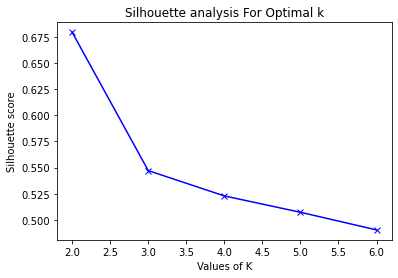

K yang optimal adalah K = 2 karena memiliki nilai silhouette score tertinggi


In [5]:

range_n = [2,3,4,5,6]
silhouette_avg = []
data_frame = df[['tebal_paruh_atas', 'panjang_sirip']]
for i in range_n:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_frame)
    silhouette_avg.append(silhouette_score(data_frame, kmeans.labels_))
plt.plot(range_n,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

print('K yang optimal adalah K = 2 karena memiliki nilai silhouette score tertinggi')

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [6]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_frame)
kmeans.inertia_


14643.579994720963

9. Visualisasikan klaster yang ada [5]

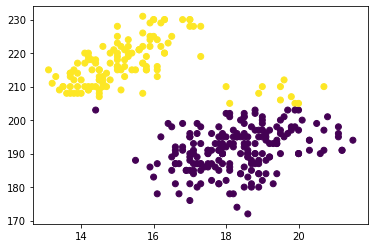

In [7]:
plt.scatter(data_frame[data_frame.columns[0]], data_frame[data_frame.columns[1]], c=kmeans.labels_)
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

In [23]:
print('Penguin dapat dibagi menjadi 2 klaster yaitu klaster penguin yang memiliki tebal paruh atas yang tebal & panjang sirip yang pendek dan tebal paruh yang tipis & panjang sirip yang panjang')
print(' tetapi masih ada penguin yang sebenarnya lebih dekat ke klaster yang bukan klasternya')

Penguin dapat dibagi menjadi 2 klaster yaitu klaster penguin yang memiliki tebal paruh atas yang tebal & panjang sirip yang pendek dan tebal paruh yang tipis & panjang sirip yang panjang
 tetapi masih ada penguin yang sebenarnya lebih dekat ke klaster yang bukan klasternya


## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [17]:
agglomerative = AgglomerativeClustering(n_clusters=None, linkage = 'single', distance_threshold = 10).fit(data_frame)
agglomerative.children_

array([[  5, 163],
       [ 13, 141],
       [ 28,  99],
       [ 39,  54],
       [ 88, 200],
       [114, 135],
       [168, 176],
       [ 68, 129],
       [ 42,  46],
       [342, 124],
       [343, 192],
       [ 90, 140],
       [345, 164],
       [ 40,  83],
       [ 31,  97],
       [348, 101],
       [ 78, 174],
       [130, 167],
       [ 81, 113],
       [ 17,  82],
       [ 94, 146],
       [ 77, 169],
       [ 79, 157],
       [121, 182],
       [ 29, 208],
       [103, 171],
       [  8,  43],
       [145, 191],
       [244, 288],
       [219, 230],
       [292, 304],
       [224, 226],
       [365, 329],
       [218, 235],
       [237, 262],
       [256, 282],
       [369, 286],
       [229, 327],
       [248, 289],
       [283, 284],
       [373, 293],
       [287, 326],
       [215, 324],
       [246, 301],
       [339, 144],
       [178, 340],
       [ 76,  20],
       [211, 143],
       [133, 156],
       [  3, 355],
       [ 36, 357],
       [170, 142],
       [ 67,

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

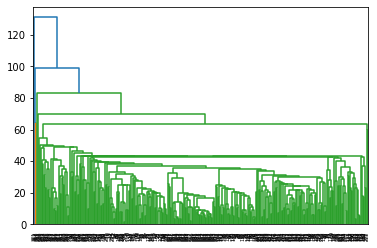

jumlah klaster nya adalah 3, tidak sama dengan klaster pada kmeans yang klasternya 2


In [24]:
selected_data = agglomerative.children_
clusters = shc.linkage(selected_data, 
            method='single', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()
print('jumlah klaster nya adalah 3, tidak sama dengan klaster pada kmeans yang klasternya 2')

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [21]:
agglomerative_2 = AgglomerativeClustering(n_clusters=3, linkage = 'single', distance_threshold = None).fit(data_frame)

14. Visualisasikan hasil *clustering assignment* [4]

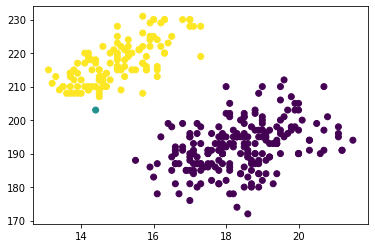

In [22]:
plt.scatter(data_frame[data_frame.columns[0]], data_frame[data_frame.columns[1]], c=agglomerative_2.labels_)
plt.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

15. Categorical feature tidak bisa dilakukan clustering menggunakan kmeans karena kmeans memerlukan nilai means, jadi categorical featurenya dilakukan clustering menggunakan kmode dengan centroid merepresentasikan value yang paling sering muncul.

16. Karena k-means akan cenderung memilih bentuk yang globural, tetapi jika hasil non globural menghasilkan insight yang bagus dan masuk akal maka clustering berjalan dengan baik

17. Tidak, karena centroidnya berubah-ubah seraca iteratif sehingga pemisahan data menjadi lebih baik.

18. intra-cluster similarity: Menggunakan jumlah kuadrat jarak euclidean antara centroid dan anggota cluster lainnya
    inter-cluster dissimilarity: Menggunakan jarak antar cluster centroid
    Jika jarak Intercluster antara cluster yang berbeda bertambah dan jarak Intracluster dari cluster yang sama berkurang, maka kita dapat mengatakan bahwa itu adalah algoritma clustering yang baik.